In [58]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, classification_report

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [4]:
X

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0
6,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1,0,0,0,0,0
7,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1,0,0,0,0,0
8,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,1,0,0,0,0,0
9,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1,0,0,0,0,0
10,6,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1,0,0,0,0,0


In [48]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'max_depth': 2,
          'learning_rate': .2,
          'subsample': .85,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04023458810692853
Percent Type II errors: 0.15370976541189307

Test set accuracy:
Percent Type I errors: 0.07975460122699386
Percent Type II errors: 0.18036809815950922


In [49]:
table_train

col_0,0.0,1.0,All
partner,,,
0.0,4213,295,4508
1.0,1127,1697,2824
All,5340,1992,7332


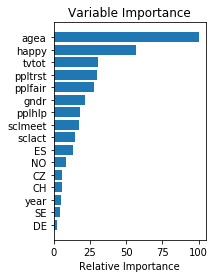

In [10]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Creating new features

Applying more overfitting-prevention strategies like subsampling

More iterations

Trying a different loss function

Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [60]:
class Preprocessing(BaseEstimator, TransformerMixin):
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        return X
    
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
    
pipeline = Pipeline([
#     ('preprocessing', Preprocessing()),
    ('dimensions', PCA()),
    #('dummy_vars', ce.OneHotEncoder(cols=['cntry'])),
    ('classifier', clf)
])

pipeline.fit(X_train, y_train)
print(classification_report(y_train, pipeline.predict(X_train)))
print(classification_report(y_test, pipeline.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.78      0.95      0.86      4508
        1.0       0.87      0.58      0.70      2824

avg / total       0.82      0.81      0.80      7332

             precision    recall  f1-score   support

        0.0       0.72      0.93      0.81       505
        1.0       0.79      0.40      0.53       310

avg / total       0.74      0.73      0.71       815



In [81]:
gridsearch = GridSearchCV(pipeline, {
    #'dimensions': [PCA(), Pipeline([])],
    'classifier__n_estimators': [150, 200, 250, 500, 1000],
    'classifier__max_depth': [2, 4],
    'classifier__learning_rate': [0.99, 0.3, 0.1],
    'classifier__subsample': [1.0, 0.3],
    'classifier__loss': ['deviance', 'exponential']
}, scoring='f1', cv=5, refit=True, n_jobs=4, verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   37.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed: 13.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('dimensions', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'classifier__n_estimators': [150, 200, 250, 500, 1000], 'classifier__max_depth': [2, 4], 'classifier__learning_rate': [0.99, 0.3, 0.1], 'classifier__subsample': [1.0, 0.3], 'classifier__loss': ['deviance', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [82]:
from pprint import pprint

pprint(gridsearch.best_estimator_.named_steps)
df = pd.DataFrame(gridsearch.cv_results_)


{'classifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=None, subsample=0.3, verbose=0,
              warm_start=False),
 'dimensions': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)}


C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_arg

In [83]:
df.sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__learning_rate,param_classifier__loss,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__subsample,params,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
101,1.306477,0.008623,0.598230,0.637887,0.1,exponential,2,150,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.613277,0.633909,0.602198,0.640977,0.627680,0.634569,0.180283,0.005214,0.023105,0.009946
83,2.038223,0.011430,0.595564,0.665568,0.1,deviance,2,200,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.628392,0.667020,0.600000,0.665962,0.617476,0.660148,0.351011,0.002338,0.029784,0.005038
107,3.775848,0.015641,0.592823,0.692250,0.1,exponential,2,500,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.631256,0.691127,0.603774,0.697553,0.629490,0.692527,0.167721,0.002251,0.042623,0.004038
103,1.147654,0.006417,0.591602,0.651120,0.1,exponential,2,200,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.623950,0.645900,0.603376,0.651547,0.629559,0.658911,0.036011,0.000490,0.042713,0.006829
81,1.257747,0.011229,0.589109,0.651255,0.1,deviance,2,150,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.628030,0.643715,0.617801,0.655117,0.642292,0.654011,0.154658,0.004887,0.073456,0.006220
41,0.895784,0.008824,0.586757,0.698045,0.3,deviance,2,150,0.3,"{'classifier__learning_rate': 0.3, 'classifier...",...,0.607393,0.706944,0.556034,0.703732,0.633588,0.695872,0.032599,0.003665,0.029441,0.006988
105,1.569978,0.011631,0.585527,0.657202,0.1,exponential,2,250,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.629474,0.650054,0.590604,0.654226,0.606250,0.653591,0.064842,0.005253,0.040940,0.007067
63,1.113563,0.006818,0.583024,0.688767,0.3,exponential,2,200,0.3,"{'classifier__learning_rate': 0.3, 'classifier...",...,0.610951,0.682902,0.607880,0.697849,0.640125,0.688990,0.039279,0.000400,0.053626,0.005196
65,1.431207,0.008021,0.582142,0.703478,0.3,exponential,2,250,0.3,"{'classifier__learning_rate': 0.3, 'classifier...",...,0.632860,0.707490,0.579208,0.711089,0.615949,0.702256,0.053790,0.000634,0.044202,0.008188
115,3.454996,0.017245,0.581684,0.763276,0.1,exponential,4,250,0.3,"{'classifier__learning_rate': 0.1, 'classifier...",...,0.636917,0.766522,0.593361,0.759079,0.613636,0.760742,0.611548,0.005358,0.051377,0.003804


In [84]:
print(classification_report(y_test, gridsearch.best_estimator_.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.74      0.91      0.81       505
        1.0       0.77      0.46      0.58       310

avg / total       0.75      0.74      0.72       815



In [76]:
gridsearch = GridSearchCV(pipeline, {
    #'dimensions': [PCA(), Pipeline([])],
    'classifier__n_estimators': [500],
    'classifier__max_depth': [2],
    #'classifier__learning_rate': [0.99, 0.3, 0.1],
    #'classifier__subsample': [1.0, 0.3],
    #'classifier__loss': ['deviance', 'exponential']
}, scoring='f1', cv=5, refit=True, n_jobs=4, verbose=1)

gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   10.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('dimensions', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'classifier__n_estimators': [500], 'classifier__max_depth': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [77]:

pprint(gridsearch.best_estimator_.named_steps)
df = pd.DataFrame(gridsearch.cv_results_)


{'classifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
 'dimensions': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)}


C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lkonig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_arg

In [78]:
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__max_depth,param_classifier__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,4.340234,0.00625,0.545014,0.709821,2,500,"{'classifier__max_depth': 2, 'classifier__n_es...",1,0.271756,0.703117,...,0.636086,0.717774,0.609009,0.708975,0.631884,0.70582,0.303594,0.007655,0.138292,0.005251


             precision    recall  f1-score   support

        0.0       0.72      0.93      0.81       505
        1.0       0.79      0.39      0.52       310

avg / total       0.74      0.73      0.70       815



Pipeline(memory=None,
     steps=[('dimensions', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              ...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])